<body>
    <div>
        <h2 style='font-family: cursive; font-size: 40px;'>Método de Muller</h2>
        <img src=https://media.geeksforgeeks.org/wp-content/uploads/Muller-Method.png alt=middle style="height: 340px">
    </div>
</body>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<div style="font-size: 19px">
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\begin{cases}
    f(x_0) = a*(x_0 - x_1)^2 + b*(x_0 - x_1) + c \\
    f(x_1) = a*(x_1 - x_2)^2 + b*(x_1 - x_2) + c \\
    f(x_2) = c
\end{cases}$
<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$r = x_2 - \frac {2*c} {b + sgn(b)*\sqrt{b^2-4*a*c} }$
</div>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<div style='text-align: center; font-size: 16px;'>
    $x_0$: Punto de la función. <br>
    $x_1$: Punto de la función. <br>
    $x_2$: Punto de la función.
</div>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>

<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">Por medio de este método se encuentran por medio de este método se encuentran tanto raíces reales como complejas tanto raíces reales como complejas.</td>
        <td style="text-align: left;"> En el Método de Müller se escoge el signo que en el Método de Müller se escoge el signo que coincida en el signo de “b”, esta elección coincida en el signo de “b”, esta elección proporciona como resultado el denominador proporciona como resultado el denominador mas grande, lo que dará la raíz estimada más grande, lo que dará la raíz estimada mas cercana a $x$ cercana a $x_2$. Una vez que se determino $x$. Una vez q se determino $x_3$ el proceso se repite, esto trae de que un valor es proceso se repite, esto trae de que un valor es descartado.</td>
    </tr>
   
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Para i iteraciones</li>
    <div>
        <li>
            Resuelve el sistema de ecuaciones dado por
            <ul>
                <li>$a(x_0-x_1)^2 + b(x_0-x_1) + c = f(x_0)$</li>
                <li>$a(x_1-x_2)^2 + b(x_1-x_2) + c = f(x_1)$</li>
                <li>$c=f(x_2)$</li>
            </ul>
        </li>
    </div>
    <li>$x_3 = x_2 - \frac{2*c}{b+sgn(b)*\sqrt{b**2-4*a*c}}$</li>
    <li>x0=x1</li>
    <li>x1=x2</li>
    <li>x2=x3</li>
    <li>$error = |f(x_k)|$</li>
    <li>Fin Para</li>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

In [11]:
format long

function [a1,b1,c1]=solve_equations(footion,x0,x1,x2)
    %Esta funcion resuelve el sistema de ecuacion que usa el metodo de muller.
    %Sintaxis: solve_equations(footion,x0,x1,x2)
    %
    %Parámetros Iniciales:
    %            footion = Funcion que se esta resolviendo.
    %            x0 = Punto de la funcion.
    %            x1 = Punto de la funcion.
    %            x2 = Punto de la funcion.
    %
    %
    %Parámetros de Salida:
    %            a1 = La solucion de 'a' en el sistema de ecuaciones.
    %            b1 = La solucion de 'b' en el sistema de ecuaciones.
    %            c1 = La solucion de 'c' en el sistema de ecuaciones.
    %
    warning('off', 'all');
    pkg load symbolic
    syms a b c
    eqs = [ a*(x0-x1)^2+b*(x0-x1)+c == footion(x0), 
            a*(x1-x2)^2+b*(x1-x2)+c == footion(x1), 
            c == footion(x2)];
    vars = [a b c];
    [a1,b1,c1] = solve(eqs, vars);
    a1=cast(real(a1), "double");
    b1=cast(real(b1), "double");
    c1=cast(real(c1), "double");
end

function [r,e]=muller_aux(footion,x0,x1,x2,i,tol,iter,e)
    %Esta función auxiliar del metodo de muller.
    %
    %Sintaxis:  muller_aux(footion,x0,x1,x2,i,tol,iter,e)
    % 
    %Parámetros Iniciales: 
    %            footion = Funcion que se esta resolviendo.
    %            x0 = Punto de la funcion.
    %            x1 = Punto de la funcion.
    %            x2 = Punto de la funcion.
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            i = iteracion actual.
    %            e = Lista de errores.
    %            
    %Parámetros de Salida:                           
    %            r = aproximación del cero de la función f
    %            e =  |f(x)|
    %
    if abs(x2-x1)/x2 > tol && i < iter
        [a,b,c] = solve_equations(footion,x0,x1,x2);
        x3 = real(x2 - (2*c)/(b+sign(b)*sqrt(b^2-4*a*c)));
        error = abs(x3-x2);
        [r,e]=muller_aux(footion,x1,x2,x3,i+1,tol,iter,[e error]);
    else
        r=x2;
        e=e;
    end
end

function [r,e]=muller(f, x0, x1, x2, tol, iter)
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de muller.
    %
    %Sintaxis:  muller(f, x0, x1, x2, tol, iter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f.
    %            x0 = Punto de la funcion.
    %            x1 = Punto de la funcion.
    %            x2 = Punto de la funcion.
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            
    %Parámetros de Salida:                           
    %            r = aproximación del cero de la función f
    %            e =  |f(x)|
    %
    footion = str2func(strcat('@(x)', f));
    
    if tol > 10^-16
        [r,e] = muller_aux(footion,x0,x1,x2,1,tol,iter,[abs(x2-x2)/x2]);
    else
        r=0;
        e=[];
        display("La tolerancia es muy pequeña, ponga una más grande.");
    end
    plot(0:length(e)-1,e);
end



<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [7]:
from numpy import sign
from math import sqrt

def len_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list


def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(len_list(len(e)), e)
    
    
def solve_equations(footion, x0, x1, x2):
    """
    Esta funcion resuelve el sistema de ecuacion que usa el metodo de muller.
    Parametros iniciales:
    footion = Funcion que se esta resolviendo.
    x0 = Punto de la función.
    x1 = Punto de la función.
    x2 = Punto de la función.
    
    Parámetros de Salida: 
    res = Corresponde a las 3 soluciones del sistema de ecuaciones.
    """
    import sympy as sym
    sym.init_printing()
    a,b,c = sym.symbols('a,b,c')
    eq1 = sym.Eq(a*(x0-x1)**2 + b*(x0-x1) + c, footion.subs({'x':x0}))
    eq2 = sym.Eq(a*(x1-x2)**2 + b*(x1-x2) + c, footion.subs({'x':x1}))
    eq3 = sym.Eq(c, footion.subs({'x':x2}))
    res = sym.solve([eq1, eq2, eq3], (a, b, c))
    return res[a], res[b], res[c]
    
    
def muller(f, x0, x1, x2, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo de Muller.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f.
    x0 = Punto de la función.
    x1 = Punto de la función.
    x2 = Punto de la función.
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    
    Parámetros de Salida: 
    [x3,error], donde                
    x3 = aproximación del cero de la función f.
    error =  |f(x_k)|
    """
    from sympy import sympify
    footion = sympify(f)
    e = []
    error = tol + 1
    x3 = 0
    for i in range(iter):
        if error < tol:
            break
        a, b, c = solve_equations(footion, x0, x1, x2)
        x3 = float(x2 - (2*c)/(b+sign(b)*sqrt(abs(b**2-4*a*c))));
        error = abs(x3-x2);
        x0 = x1
        x1 = x2
        x2 = x3
        e.append(error)
    return x3, e


<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

1.8955003485098867 [0.1230565397795571, 0.1977056197248186, 0.06605785796091257, 0.08541502321464134, 0.008047651732159045, 0.006570255851476192, 1.6707430213536156e-05]


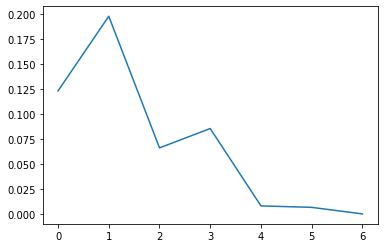

In [12]:
x3, e = muller('sin(x)-x/2', 2, 2.2, 1.8, 10^-8, 7)
print(x3, e)
plot(e)

<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

r =  1.895494267018637
e =

 Columns 1 through 3:

   0.000000000000000e+00   1.230565387971785e-01   1.977056668020858e-01

 Columns 4 through 6:

   2.147840536638856e-03   2.296831923290177e-02   2.843679901776142e-06

 Column 7:

   2.750399736828335e-05



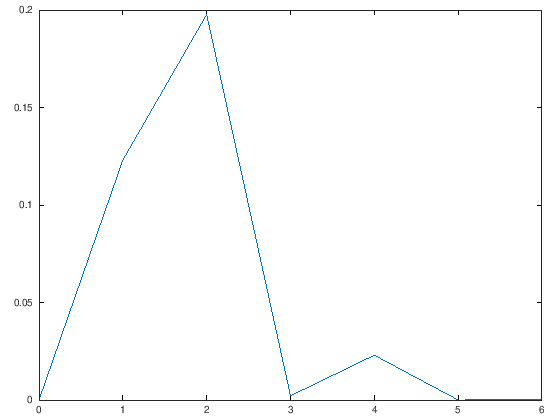

In [13]:
[r,e] = muller('sin(x)-x/2', 2, 2.2, 1.8, 10^-8, 7)
